In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import scipy.optimize as opt
from tqdm import tqdm
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from sympy import lambdify

In [3]:
filename = 'pareto_low_adv_refit.csv'  
t_eq=pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/'+filename)

df_full = pd.read_csv('SMBH_Data_03_06_24.csv',header=1)

In [4]:
low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','B-V','V-[3.6]','GJC23W1-W2','GJC23W2-W3','GJC23log(M*,gal/M_sun)',
       'GJC23log(SFR)','GJC23log(sSFR)','log<Sigma>_e','log<Sigma>_h','M_BH']

easy_obs_para=['LogSigma0','Concentration_Index','logSigma0sph','log_sigma0','dc','logRhphi','M*_sph','ube','bri25','bve','bvtc','logR10phi','M*_gal','log_B/T',
 'logRh','log_n_sph_eq','blum','log_R_e_sph_maj','logblum','log_n_sph_maj','logR10','Pseudobulge','AGN','Multiple','Ring','BCG','Disk','cD',
 'Bar','Core','Compactness','ETG','T-type','log10(R10_kpc)','log10(R90_kpc)','B-V','V-[3.6]','GJC23W1-W2','GJC23W2-W3','GJC23log(M*,gal/M_sun)','M_BH']

#low_scatter_para.append('M_BH_std_sym')
#easy_obs_para.append('M_BH_std_sym')
std_white_list=['ube_std', 'bri25_std', 'bve_std', 'Pseudobulge_std', 'AGN_std', 'Multiple_std', 'Ring_std', 'BCG_std', 'Disk_std', 'cD_std', 'Bar_std', 'Core_std', 'Compactness_std', 'ETG_std', 'M_BH_std']

In [5]:
easy_obs_para_std=easy_obs_para.copy()
for i in easy_obs_para:
    easy_obs_para_std.append(i+'_std')

low_scatter_para.append('M_BH_std_sym')
easy_obs_para.append('M_BH_std_sym')

# remove std_white_list from easy_obs_para_std
for i in std_white_list:
    easy_obs_para_std.remove(i)

In [6]:
df=df_full[easy_obs_para]
df=df.dropna()
len(df)

93

In [7]:
df=df_full[easy_obs_para_std]
# drop the column with all nan
df=df.dropna(axis=1,how='all')
df=df.dropna()
len(df)

28

In [8]:
df=df_full[low_scatter_para]
df=df.dropna()
len(df)

93

In [9]:
df=df_full[low_scatter_para+['log_sigma0_std','log_Rho_soi_exact_new_std']]
df=df.dropna()
len(df)

93

In [10]:
t_eq[t_eq['complexity']==7]

,complexity,loss,score,equation,sympy_format,lambda_format,number_constants,variables,number_variables,unique_number_variables,evolutions,iterations,fitting_format,num_fitting_variables,initial_constant_guess,LLL,intrinsic_scatter,refit_equation,refit_wrmse
8,7,0.176466,0.064409,((x66 - x73) + (x14 + -1.1261230669061786)),x14 + x66 - x73 - 1.1261230669061786,PySRFunction(X=>x14 + x66 - x73 - 1.1261230669...,1,"{'x73', 'x14', 'x66'}",3,3,0,1,x14 + x66 - x73 - p[0],1,['1.12612306690618'],-106.801200,0.493890,x14 + x66 - x73 - 1.2861802855530329,0.210346
17,7,0.109905,0.075086,((x66 - (0.07322251238208793 * x43)) + x52),-0.07322251238208793*x43 + x52 + x66,PySRFunction(X=>-0.07322251238208793*x43 + x52...,1,"{'x43', 'x52', 'x66'}",3,3,0,3,-p[0]*x43 + x52 + x66,1,['0.0732225123820879'],-86.186859,0.447205,-0.12272107548866786*x43 + x52 + x66,0.122621
64,7,0.092909,0.042356,(((x15 ^ 1.6694534318850982) / 0.5501605800908...,1.817651129848046*x15**1.6694534318850982 + 1....,PySRFunction(X=>1.817651129848046*x15**1.66945...,3,{'x15'},1,1,0,22,p[0]*x15**p[2] + p[1],3,"['1.81765112984805', '1.09372711904485', '1.66...",-78.615743,0.420795,0.08732693504789066*x15**4.202422104946601 + 5...,0.108858
72,7,0.088138,0.038524,((x15 * 3.4515811906064036) - (x30 * 0.1687549...,3.4515811906064036*x15 - 0.16875492953708354*x30,PySRFunction(X=>3.4515811906064036*x15 - 0.168...,2,"{'x30', 'x15'}",2,2,0,46,p[1]*x15 - p[0]*x30,2,"['0.168754929537084', '3.4515811906064']",-56.336109,0.384116,3.4019416490560417*x15 - 0.1863271373944622*x30,0.092527
197,7,0.111462,0.076694,(((x66 + -0.16411413870402333) + x52) - x73),x52 + x66 - x73 - 0.16411413870402333,PySRFunction(X=>x52 + x66 - x73 - 0.1641141387...,1,"{'x73', 'x52', 'x66'}",3,3,1,1,x52 + x66 - x73 - p[0],1,['0.164114138704023'],-82.228572,0.446051,x52 + x66 - x73 - 0.2766284850071689,0.124415
207,7,0.109413,0.085970,((x66 - (0.07330030652615083 * x42)) + x52),-0.07330030652615083*x42 + x52 + x66,PySRFunction(X=>-0.07330030652615083*x42 + x52...,1,"{'x52', 'x66', 'x42'}",3,3,1,3,-p[0]*x42 + x52 + x66,1,['0.0733003065261508'],-84.841635,0.443557,-0.12190695412501731*x42 + x52 + x66,0.122530
245,7,0.076663,0.117779,((x39 + 7.826276315070935) - (x43 + 0.47293796...,x39 - x43 + 7.353338350775887,PySRFunction(X=>x39 - x43 + 7.353338350775887),2,"{'x43', 'x39'}",2,2,1,61,x39 - x43 + p[0],1,['7.35333835077589'],-61.282271,0.404009,x39 - x43 + 7.357622333485953,0.076681
246,7,0.070493,0.159731,(((x39 + 6.507678347335686) - x42) + x71),x39 - x42 + x71 + 6.507678347335686,PySRFunction(X=>x39 - x42 + x71 + 6.5076783473...,1,"{'x42', 'x39', 'x71'}",3,3,1,65,x39 - x42 + x71 + p[0],1,['6.50767834733569'],-42.771804,0.343938,x39 - x42 + x71 + 6.543539114606435,0.070697
286,7,0.067214,0.271094,((x15 * 3.259252519196158) - (1.04245382066279...,3.259252519196158*x15 - 1.0424538206627934/x53,PySRFunction(X=>3.259252519196158*x15 - 1.0424...,2,"{'x53', 'x15'}",2,2,1,180,p[0]*x15 - p[1]/x53,2,"['3.25925251919616', '1.04245382066279']",-60.369823,0.381981,3.2055834803812484*x15 - 1.0394739104071489/x53,0.082990
287,7,0.066285,0.285023,((x15 * 3.3178149364517946) - (x71 / x53)),3.3178149364517946*x15 - x71/x53,PySRFunction(X=>3.3178149364517946*x15 - x71/x53),1,"{'x53', 'x71', 'x15'}",3,3,1,181,p[0]*x15 - x71/x53,1,['3.31781493645179'],-53.102307,0.355942,3.260877348816335*x15 - x71/x53,0.082643


In [11]:
low_scatter_para[43]

'log_Rho_soi_exact_new'

In [ ]:
low_scatter_para[15]

'log_sigma0'

In [13]:
t_eq.iloc[354]

complexity                                                                 7
loss                                                                0.045044
score                                                               0.649693
equation                   ((x15 * 4.18108120122399) + (x43 * -0.44681038...
sympy_format                   4.18108120122399*x15 - 0.4468103890087167*x43
lambda_format              PySRFunction(X=>4.18108120122399*x15 - 0.44681...
number_constants                                                           2
variables                                                     {'x43', 'x15'}
number_variables                                                           2
unique_number_variables                                                    2
evolutions                                                                 1
iterations                                                               915
fitting_format                                           p[1]*x15 - p[0]*x43

In [14]:
df=df[['M_BH','M_BH_std_sym','log_sigma0','log_sigma0_std','log_Rho_soi_exact_new','log_Rho_soi_exact_new_std']]
df

,M_BH,M_BH_std_sym,log_sigma0,log_sigma0_std,log_Rho_soi_exact_new,log_Rho_soi_exact_new_std
1,9.380211,0.180956,2.471453,0.009328,2.419688,0.122041
3,9.102971,0.086075,2.515012,0.007217,2.335721,0.078167
6,5.740000,0.103967,1.538951,0.039173,2.550809,0.065420
7,8.677184,0.099526,2.374180,0.008257,2.175640,0.066468
9,7.591065,0.194876,2.296073,0.006238,4.653101,0.080682
...,...,...,...,...,...,...
131,8.808460,0.027143,2.353474,0.006389,2.647789,0.073080
132,8.279168,0.052000,2.283934,0.020983,3.609915,0.157888
133,6.833669,0.101335,2.030762,0.014485,2.981174,0.070204
134,6.198130,0.108574,1.987443,0.024855,1.607438,0.069536


In [15]:
def str2equ(equation):
    return lambdify(list(dict.fromkeys(re.findall(r'\bx\d+',equation))),equation)

func = str2equ(t_eq.iloc[496]['fitting_format'])

In [16]:
t_eq.iloc[354]['refit_equation']

'4.016979095019439*x15 - 0.33755051407998493*x43'

In [18]:
func

<function _lambdifygenerated(x15)>

In [21]:
def func(p,i):
    return p[0]*p[2+i+1] + p[1]*p[93+2+i+1]


def loglikelihood(p):
    term0 = np.log(2*np.pi)*len(df)*(t_eq.iloc[354]['unique_number_variables']+1)

    term1 = (np.log(df['M_BH_std_sym']**2+p[2]**2)).sum()
    term1 += np.log(df['log_sigma0_std']**2).sum()
    term1 += np.log(df['log_Rho_soi_exact_new_std']**2).sum()

    term2 = 0
    for i in range(len(df)):
        term2 += (df['M_BH'].iloc[i] - func(p,i))**2/(df['M_BH_std_sym'].iloc[i]**2+p[2]**2)
    
    term3 = 0
    for i in range(len(df)):
        term3 += ((df['log_sigma0'].iloc[i]-p[2+i+1])/df['log_sigma0_std'].iloc[i])**2
        term3 += ((df['log_Rho_soi_exact_new'].iloc[i]-p[2+93+i+1])/df['log_Rho_soi_exact_new_std'].iloc[i])**2

    print(p[:4],term0+term1+term2+term3)
    return term0+term1+term2+term3

current_parameter_vector = np.zeros(93*2+3)
current_parameter_vector[:2] = np.array([4.016979095019439,0.33755051407998493])
current_parameter_vector[2] = t_eq.iloc[354]['intrinsic_scatter']
current_parameter_vector[3:3+93] = df['log_sigma0']
current_parameter_vector[3+93:3+93*2] = df['log_Rho_soi_exact_new']

# 3 sigma bounds depending on std
bounds = [(-np.inf,np.inf)]*2+[(0,np.inf)]+[(i-3*j,i+3*j) for i,j in zip(df['log_sigma0'],df['log_sigma0_std'])]+[(i-3*j,i+3*j) for i,j in zip(df['log_Rho_soi_exact_new'],df['log_Rho_soi_exact_new_std'])]
result = opt.minimize(loglikelihood, current_parameter_vector, method='L-BFGS-B', tol=1e-5, options={'maxiter':5e4, 'maxfev':5e4, 'adaptive':True},bounds=bounds)

/tmp/ipykernel_3162937/2570831669.py:32: OptimizeWarning: Unknown solver options: maxfev, adaptive
  result = opt.minimize(loglikelihood, current_parameter_vector, method='L-BFGS-B', tol=1e-5, options={'maxiter':5e4, 'maxfev':5e4, 'adaptive':True},bounds=bounds)


[4.0169791  0.33755051 0.37219487 2.47145307] 1439.8274647744552
[4.01697911 0.33755051 0.37219487 2.47145307] 1439.827514491466
[4.0169791  0.33755052 0.37219487 2.47145307] 1439.827531540237
[4.0169791  0.33755051 0.37219488 2.47145307] 1439.8273559706022
[4.0169791  0.33755051 0.37219487 2.47145308] 1439.8274654144236
[4.0169791  0.33755051 0.37219487 2.47145307] 1439.8274657588727
[4.0169791  0.33755051 0.37219487 2.47145307] 1439.827465475409
[4.0169791  0.33755051 0.37219487 2.47145307] 1439.827465637331
[4.0169791  0.33755051 0.37219487 2.47145307] 1439.827466232299
[4.0169791  0.33755051 0.37219487 2.47145307] 1439.8274663839206
[4.0169791  0.33755051 0.37219487 2.47145307] 1439.8274660354296
[4.0169791  0.33755051 0.37219487 2.47145307] 1439.827465346936
[4.0169791  0.33755051 0.37219487 2.47145307] 1439.8274657013433
[4.0169791  0.33755051 0.37219487 2.47145307] 1439.8274656892913
[4.0169791  0.33755051 0.37219487 2.47145307] 1439.8274652093867
[4.0169791  0.33755051 0.372194

In [23]:
result.x

array([ 4.0359076 , -0.35103187,  0.33499918,  2.47204017,  2.5146159 ,
        1.55537535,  2.37386512,  2.29602508,  2.29284413,  2.2135377 ,
        2.38781981,  2.34802386,  2.47018839,  2.25404883,  2.52115425,
        2.42502798,  2.52125973,  2.14901418,  2.18687099,  2.28190535,
        2.49364741,  2.41527656,  2.31627648,  2.13491971,  2.30648274,
        2.15809503,  2.37510993,  2.0177222 ,  2.33156876,  2.34668166,
        2.28974451,  2.33463661,  2.489431  ,  2.3908578 ,  2.41805632,
        2.24098949,  2.47267596,  2.46753462,  2.04520657,  2.25784756,
        2.10919085,  2.44325191,  2.23973868,  2.06758791,  2.23481633,
        2.45013075,  2.25152423,  2.50958398,  2.35282273,  2.39843409,
        2.19391152,  2.04886545,  2.14824478,  2.35797665,  2.51935399,
        2.21864672,  2.00859205,  2.14903957,  2.59453177,  2.32570112,
        2.40089193,  2.02382882,  2.53706941,  2.26061559,  2.37312031,
        2.36226227,  2.37549462,  2.5851737 ,  2.10749665,  1.83

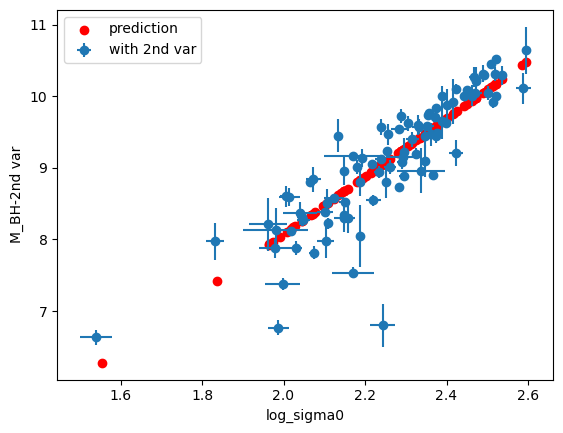

In [29]:
plt.errorbar(df['log_sigma0'],
            df['M_BH']-(result.x[3+93*1:3+93*2] * result.x[1]),
            xerr=df['log_sigma0_std'],
            yerr=df['M_BH_std_sym'],
            label='with 2nd var',fmt='o')
# plt.errorbar(df['log_sigma0'],
#             df['M_BH'],
#             xerr=df['log_sigma0_std'],
#             yerr=df['M_BH_std_sym'],
#             label='without 2nd var',fmt='o')
plt.scatter(result.x[3:3+93*1],result.x[0]*result.x[3:3+93*1],label='prediction',c='r')
plt.xlabel('log_sigma0')
plt.ylabel('M_BH-2nd var')
plt.legend()
# plt.xlim(2.5,2.6)
# plt.ylim(9,10)

In [18]:
import torch
from torch import nn, optim

# Convert the dataframe to PyTorch tensors
M_BH = torch.tensor(df['M_BH'].values, dtype=torch.float32)
M_BH_std_sym = torch.tensor(df['M_BH_std_sym'].values, dtype=torch.float32)

log_sigma0 = torch.tensor(df['log_sigma0'].values, dtype=torch.float32)
log_sigma0_std = torch.tensor(df['log_sigma0_std'].values, dtype=torch.float32)
log_Rho_soi_exact_new = torch.tensor(df['log_Rho_soi_exact_new'].values, dtype=torch.float32)
log_Rho_soi_exact_new_std = torch.tensor(df['log_Rho_soi_exact_new_std'].values, dtype=torch.float32)


# Define the model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.p0 = nn.Parameter(torch.tensor(4.016979095019439, dtype=torch.float32))
        self.p1 = nn.Parameter(torch.tensor(0.33755051407998493, dtype=torch.float32))
        self.p2 = nn.Parameter(torch.tensor(t_eq.iloc[354]['intrinsic_scatter'], dtype=torch.float32))
        self.p3 = nn.Parameter(log_sigma0.clone())
        self.p4 = nn.Parameter(log_Rho_soi_exact_new.clone())

    def forward(self, i):
        return self.p0 * self.p3[i] + self.p1 * self.p4[i]

# Instantiate the model
model = Model()

# Define the loss function
def loglikelihood():
    term0 = torch.log(torch.tensor(2 * torch.pi)) * len(df) * (t_eq.iloc[354]['unique_number_variables'] + 1)

    term1 = (torch.log(M_BH_std_sym**2 + model.p2**2)).sum()
    term1 += torch.log(log_sigma0_std**2).sum()
    term1 += torch.log(log_Rho_soi_exact_new_std**2).sum()

    term2 = ((M_BH - model(torch.arange(len(df))))**2 / (M_BH_std_sym**2 + model.p2**2)).sum()

    term3 = (((log_sigma0 - model.p3) / log_sigma0_std)**2).sum()
    term3 += (((log_Rho_soi_exact_new - model.p4) / log_Rho_soi_exact_new_std)**2).sum()

    return term0 + term1 + term2 + term3

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()
    loss = loglikelihood()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}', model.p0.item(), model.p1.item(), model.p2.item())

# Get the optimized parameters
optimized_params = {name: param.data for name, param in model.named_parameters()}
print(optimized_params)

Epoch 0, Loss: 1439.828125 4.006978988647461 0.3275505304336548 0.382194846868515
Epoch 100, Loss: -774.2637329101562 3.656987428665161 -0.05648025870323181 0.592024564743042
Epoch 200, Loss: -785.757568359375 3.707996129989624 -0.09547293931245804 0.530662477016449
Epoch 300, Loss: -799.2637329101562 3.778484344482422 -0.15009355545043945 0.46121272444725037
Epoch 400, Loss: -811.4757690429688 3.861464500427246 -0.21446384489536285 0.39989587664604187
Epoch 500, Loss: -819.2232666015625 3.939484119415283 -0.27515557408332825 0.3587720990180969
Epoch 600, Loss: -822.2702026367188 3.9944584369659424 -0.3180660605430603 0.33874961733818054
Epoch 700, Loss: -823.0023803710938 4.0236711502075195 -0.34093624353408813 0.33165889978408813
Epoch 800, Loss: -823.12109375 4.036125659942627 -0.35070544481277466 0.32958340644836426
Epoch 900, Loss: -823.1351318359375 4.040624141693115 -0.35423699021339417 0.32899588346481323
Epoch 1000, Loss: -823.136474609375 4.042034149169922 -0.3553442656993866

In [19]:
loss

tensor(-823.1274, grad_fn=<AddBackward0>)

In [20]:
df['M_BH']-model(torch.arange(len(df))).detach().numpy()

1      0.243953
3     -0.229774
6      0.350473
7     -0.144488
9     -0.035755
         ...   
131    0.233586
132    0.302038
133   -0.305102
134   -1.160800
142    0.453944
Name: M_BH, Length: 93, dtype: float64

In [22]:
model.p4.detach().numpy()

array([2.4104562 , 2.3400655 , 2.5463045 , 2.177571  , 4.653613  ,
       3.6081512 , 3.8344083 , 2.135515  , 2.6774414 , 2.5302796 ,
       1.3701    , 3.8204737 , 1.2910677 , 0.68945014, 3.4297366 ,
       2.5977407 , 3.325746  , 1.9366207 , 2.7971244 , 3.1356668 ,
       3.4296184 , 2.8329334 , 3.621994  , 3.1588683 , 3.8628428 ,
       3.1484098 , 3.6515865 , 3.0996606 , 2.3127859 , 1.0858094 ,
       1.526226  , 2.2495317 , 3.7301955 , 2.8603764 , 3.710401  ,
       1.933051  , 1.685072  , 3.9666727 , 3.0208125 , 2.6949673 ,
       2.741489  , 3.1665483 , 2.058066  , 2.4197633 , 1.7106013 ,
       2.661296  , 2.7340295 , 3.5214686 , 2.8160238 , 2.9739938 ,
       3.3412504 , 1.8267306 , 2.7289526 , 4.179655  , 3.6838355 ,
       0.98764765, 3.4112005 , 2.9059103 , 2.6924548 , 1.2165415 ,
       2.3254056 , 2.5189793 , 3.0151527 , 2.2560098 , 2.3318565 ,
       4.122849  , 2.888008  , 1.9734418 , 2.6006165 , 3.8003113 ,
       1.838129  , 3.2352314 , 2.0052779 , 3.1370218 , 4.52622

(4.5, 11.0)

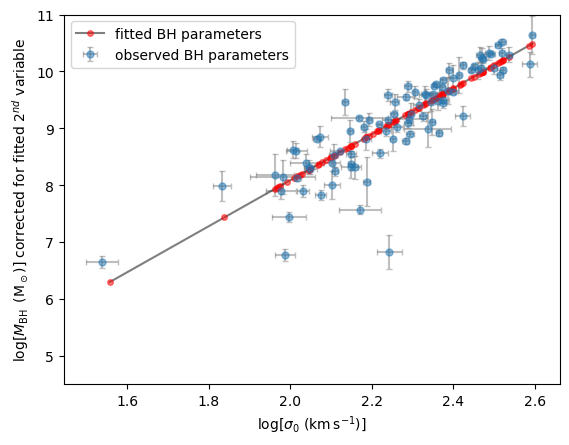

In [41]:
plt.errorbar(df['log_sigma0'],
            df['M_BH']-(model.p4.detach().numpy() * model.p1.detach().numpy()),
            xerr=df['log_sigma0_std'],
            yerr=df['M_BH_std_sym'],
            label='observed BH parameters',
            fmt='o',alpha=0.5,ms=5,capsize=2,ecolor='grey')
order=np.argsort(model.p3.detach().numpy())
plt.plot(model.p3.detach().numpy()[order],
         (model.p0.detach().numpy()*model.p3.detach().numpy())[order],
         'o-',label='fitted BH parameters',c='black',alpha=0.5,ms=4,mfc='red',mec='red')
plt.xlabel(r'$\log[\sigma_0 \,\, (\text{km}\,\text{s}^{-1})]$')
#plt.ylabel(r'$\log[{M}_\text{BH}\,\,\,(\text{M}_\odot)]-k\times\log[\rho_{soi}\,\,\,(\text{M}_\odot\,\text{pc}^{-3})]$')
plt.ylabel(r'$\log[{M}_\text{BH}\,\,\,(\text{M}_\odot)]$ corrected for fitted $2^{nd}$ variable')
plt.legend()
# plt.xlim(2.5,2.6)
plt.ylim(4.5,11)

(-4.5, 2.0)

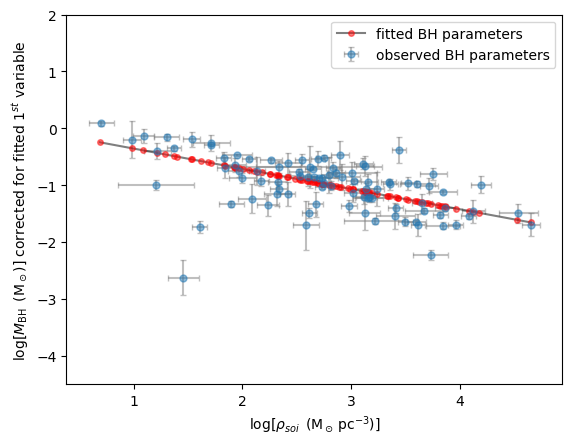

In [45]:
plt.errorbar(df['log_Rho_soi_exact_new'],
            df['M_BH']-(model.p3.detach().numpy() * model.p0.detach().numpy()),
            xerr=df['log_Rho_soi_exact_new_std'],
            yerr=df['M_BH_std_sym'],
            label='observed BH parameters',
            fmt='o',alpha=0.5,ms=5,capsize=2,ecolor='grey')
order=np.argsort(model.p4.detach().numpy())
plt.plot(model.p4.detach().numpy()[order],
         (model.p1.detach().numpy()*model.p4.detach().numpy())[order],
         'o-',label='fitted BH parameters',c='black',alpha=0.5,ms=4,mfc='red',mec='red')
plt.xlabel(r'$\log[\rho_{soi}\,\,\,(\text{M}_\odot\,\text{pc}^{-3})]$')
#plt.ylabel(r'$\log[{M}_\text{BH}\,\,\,(\text{M}_\odot)]-k\times\log[\rho_{soi}\,\,\,(\text{M}_\odot\,\text{pc}^{-3})]$')
plt.ylabel(r'$\log[{M}_\text{BH}\,\,\,(\text{M}_\odot)]$ corrected for fitted $1^{st}$ variable')
plt.legend()
# plt.xlim(2.5,2.6)
plt.ylim(-4.5,2)